# Exploring Fashion MNIST dataset with Keras


## 0. Introduction

This tutorial will provide a brief introduction to deep learning and convolutional neural network using Keras. In this tutorial, you will

1. Gain some basic understanding of deep learning and convolutional neural network.


2. Learn to use Keras, a high-level neural networks API written in Python, and try building machine learning algorithm using Fashion-MNIST dataset.


### 0.1 Deep Learning

Deep learning is a part of a broader family of machine learning inspired by artificial neural networks and biological neural networks. In the recent years, it has been applied to many fields such as Computer Vision, Natural Language Processing, Speech Recognition, Audio Recognition and Social Network Filtering. The deep learning application we are learning today is image classfication.

Traditional machine learning models depend on handcrafted features. Deep learning models are able to outperform traditional machine learning models because they also learn feature extraction. As the number of layers increases and network grows deeper, the model extracts features at multiple levels of abstraction and gets more accurate results. Therefore, deep learning is a very useful and important topic in the field of data science for knowledge discovery and prediction. 

### 0.2 Convolutional Neural Network

Convolutional neural network, commonly referred to as CNN, is a deep, feed-forward artificial neural network. It is one of the most popular deep learning architectures. CNNs are inspired by biological visual cortex. Individual cortical neurons are only sensitive to specific region of visual field. A neuron does not have to see the whole picture to detect the pattern. CNNs embrace the idea that specific components of a system have specilized tasks. A CNN is able to focus on a small part with less parameters. So we are able to subsample the picture for small part and less parameters, and process all the small parts to get a better understanding of the original picture.

Some fundemental concepts in neural network:

1. Layers: A series of data-processing modules that takes input data, filters the data, and the data come out in a more useful form.
2. Models: A deep-learning model is a directed, acyclic graph of layers. 
3. Loss function: The loss function compares these predictions to the targets, producing a loss value indicating how well the network’s predictions match what was expected. 
4. Optimizer: The optimizer represents the algorithm how the network will be optimized based on the loss function. 


Here is an example of a convolution network

[<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.adapt.full.high.jpg/1517522275430.jpg">](https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.adapt.full.high.jpg/1517522275430.jpg)

source: https://www.mathworks.com/discovery/convolutional-neural-network.html

You can see that the model contains multiple layers of image processing modulesl. The output of each layer is fed to the next layer. Through layers of training, the feature learning process is finished, and the results are finalized in the classification phase. We will walk through the entire model building in this tutorial. 


### 0.3 Keras

Keras is a high level framework developed to enable deep learning engineers to build and experiment with different models very quickly. Keras is used at Google, Netflix, Uber, CERN, Yelp and many other places to solve deep-learning problems.

Comparing with other deep learning libraries like Tensorflow, Theano, or CNTK, Keras provides a simple and modular API that hides complicated details under surface-level. The workflow in Keras appears to be very beginner-friendly for training and evaluating the models. Even if you have limited knowledge in deep learning, it is easier to start deep learning with Keras.

On the other hand, if you want to go beyond surface-level, other libraries such as Theano, Tensorflow, PyTorch are better choices. These libraries allow you to go deeper into lower level of abstraction, where more customized operations are available.

### 0.4 MNIST vs Fashion-MNIST dataset

The original MNIST ((Modified National Institute of Standards and Technology database) database is a large set of handwritten digits. It is widely used for training and benchmark in machine learning. However, it is also criticized for 
being too easy, overused and cannot represent mordern computer vision task.

Here is an example of MNIST Dataset

[<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

source: https://en.wikipedia.org/wiki/MNIST_database

Now, there is a new replacement for the MNIST database. 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28 * 28 grayscale image, associated with a label from 10 classes. The ten classes labels are:

    Label      Description
        0	  T-shirt/top
        1	  Trouser
        2	  Pullover
        3	  Dress
        4	  Coat
        5	  Sandal
        6	  Shirt
        7	  Sneaker
        8	  Bag
        9	  Ankle boot

Each class has 7,000 images. The training set has 60,000 images, and the test set has 10,000 images. It is introduced as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. In this tutorial, we will use this dataset as the example of a neural network that uses the Python library Keras to learn image classification. It is a good start point for deep learning beginners. You will experience some basic deep learning techniques and pattern recognition methods while spending minimal efforts on data preprocessing. 

Here is an example of how the data looks like:

[<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

source: https://github.com/zalandoresearch/fashion-mnist

## 1. Installation

Keras uses one of TensorFlow, Theano or CNTK, as its backend engines. Before installing Keras, we need to install one of them, and TensorFlow is recommended by Keras Documentations.


### 1.1 Install TensorFlow

Follow the instructions here: https://www.tensorflow.org/install/

### 1.2 Install Keras

Instructions here: https://keras.io/#installation

## 2. Preparation

### 2.2 Load the dataset

Keras has included Fashion-MNIST as a built-in dataset. We can simply load the training and test data using fashion_mnist.load_data(). The function returns 2 tuples: 

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).

y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [20]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2.3 Examine the dataset

In [21]:
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


The training data has a shape of 60000 x 28 x 28 with 60000 training samples each of 28 x 28 dimension.
The test data has a shape of 10000 x 28 x 28 with 10,000 testing samples.

### 2.3 Process the dataset

In [22]:
# First we convert the data type to float32
# and rescale the pixel values in range 0 - 1 inclusive
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Then we reshape the data structure for training
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Change the label of classes into one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [23]:
print('Newly structured data shapes for training:')
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Newly structured data shapes for training:
Training data shape :  (60000, 28, 28, 1) (60000, 10)
Testing data shape :  (10000, 28, 28, 1) (10000, 10)


Now that the normlization part is done, we can finally start building our model!

## 3. CNN

First we import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### 3.1 Building the model

In this example, we will use the Sequential class to define the model. The sequential class is for linear stacks of layers, which is the most common network architecture. It treats each layer as object that feeds into the next. We can stack up layer to the model, and adjust parameters such as activation function.

In [2]:
model = Sequential()

We start by adding the first convolutional layer. This layer uses several filters to calculate each parts of the image, and converts the results into a new matrix, which is also the feature map corresponding to the filters. We are using Conv2D() because we are working with images. This layer has 32 feature maps, size of 3 * 3, and a rectifier activation function. "Relu" stands for Rectified Linear Unit. It is the most popular activation function for deep neural networks for providing better training of deeper networks. If you want to learn more about different activation function, Stanford's cs231n has detailed explanation: http://cs231n.github.io/neural-networks-1/#actfun

In [3]:
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1)))
# BatchNormalization() normalizes the activations of the previous layer
model.add(BatchNormalization())
model.add(Activation('relu'))

Then we add a pooling layer with a pool size of 2 * 2. A max pooling layer devides the feature maps into small pieces, pools out the maximum of each piece, and gets a smaller matrix. This layer compresses feature representations and reduces the number of parameters, hence reduce the overfitting of the training data.

In [4]:
model.add(MaxPooling2D(pool_size=(2, 2)))

A dropout layer randomly drops out a fraction of neurons during the training process, which prevents the network to memorize the training data and reduces the dependency on the training data. The dropout fraction can be set by a parameter and the training weight can be adjusted accordingly.

In [5]:
model.add(Dropout(0.25))

We repeatedly add more layers to the model and adjust the feature map slightly.

In [6]:
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

We convert the 2D matrix data to a vector by flattening the small images we get.

In [7]:
model.add(Flatten())

Then we add a fully connected layer with 128 neurons and rectifier activation function. A fully connected layer flattens and combines all the high-level features learned by convolutional layers. We then pass the flattened output to the output layer. The output layer uses softmax activation function to predict for each of the 10 classes.

In [8]:
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Lastly we complie the model using the Adam optimizer. It is a popular replacement optimization algorithm for stochastic gradient descent, and it can efficiently solve deep learning problems with large dataset. Here is a detailed introduction to Adam optimizer: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
We uses categorical cross entropy as loss type for our multi-class classification, and we set the metrics as accuracy.

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
__________

### 4.2 Train

We have defined the model. We can train the dataset using this model by calling the fit() function, which passes input data to the model, and we save the training information in train_history.

The fit function takes epochs and batch_size as arguments. Epochs stands for the number of iterations that the model will run, and batch_size refers to the number of instances evaluated per gradient update. If unspecified, it will default to 32. Batch size can affect the prediction accuracy and can be adjusted through trial and error. Using a higher batch_size may depend on memory. 


In [137]:
train_history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 309s 5ms/step - loss: 0.6173 - acc: 0.7770 - val_loss: 0.4426 - val_acc: 0.8367
Epoch 2/20
60000/60000 [==============================] - 304s 5ms/step - loss: 0.4541 - acc: 0.8326 - val_loss: 0.4283 - val_acc: 0.8435
Epoch 3/20
60000/60000 [==============================] - 314s 5ms/step - loss: 0.4125 - acc: 0.8484 - val_loss: 0.4329 - val_acc: 0.8359
Epoch 4/20
60000/60000 [==============================] - 340s 6ms/step - loss: 0.3895 - acc: 0.8570 - val_loss: 0.3600 - val_acc: 0.8685
Epoch 5/20
60000/60000 [==============================] - 567s 9ms/step - loss: 0.3696 - acc: 0.8647 - val_loss: 0.3294 - val_acc: 0.8797
Epoch 6/20
60000/60000 [==============================] - 339s 6ms/step - loss: 0.3539 - acc: 0.8690 - val_loss: 0.3237 - val_acc: 0.8809
Epoch 7/20
60000/60000 [==============================] - 314s 5ms/step - loss: 0.3447 - acc: 0.8728 - val_loss: 0.3483 - 

We then can evaluate the model using the evaluate() function on the test data. The function will return the test loss and accuracy.

In [138]:
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_score[1])
print('Test loss: ', test_score[0])

Test accuracy:  0.8947
Test loss:  0.2902501848578453


You have just succssully trained the model on fashion-MNIST dataset. After 20 epochs, the training accuracy is 89% and the training loss is 29%.

### (Extra) 4.2.1 How will this model do on MNIST dataset?

In 0.4 MNIST vs Fashion MNIST dataset, we talked about how MNIST is criticized for being too easy and overused. Since MNIST and Fashion MNIST dataset has very similar settings in terms of image counts, sizes, we can simply use the model we just used to train MNIST and see how the accuracy and loss function changed.

In [34]:
# load  the MNIST dataset
from keras.datasets import mnist
(X_train_m, y_train_m), (X_test_m, y_test_m) = mnist.load_data()

# clean and pre-process data
X_train_m = X_train_m.astype('float32') / 255
X_test_m = X_test_m.astype('float32') / 255

X_train_m = X_train_m.reshape(X_train_m.shape[0], 28, 28, 1)
X_test_m = X_test_m.reshape(X_test_m.shape[0], 28, 28, 1)

# Change the label of classes into one-hot encoding
y_train_m = np_utils.to_categorical(y_train_m, 10)
y_test_m = np_utils.to_categorical(y_test_m, 10)

In [35]:
mnist_history = model.fit(X_train_m, y_train_m, batch_size=32, epochs=20, verbose=1, validation_data=(X_test_m, y_test_m))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 354s 6ms/step - loss: 0.2759 - acc: 0.9129 - val_loss: 0.0763 - val_acc: 0.9754
Epoch 2/20
60000/60000 [==============================] - 315s 5ms/step - loss: 0.1143 - acc: 0.9644 - val_loss: 0.0610 - val_acc: 0.9816
Epoch 3/20
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0942 - acc: 0.9713 - val_loss: 0.0534 - val_acc: 0.9839
Epoch 4/20
60000/60000 [==============================] - 321s 5ms/step - loss: 0.0797 - acc: 0.9755 - val_loss: 0.0549 - val_acc: 0.9833
Epoch 5/20
60000/60000 [==============================] - 328s 5ms/step - loss: 0.0728 - acc: 0.9776 - val_loss: 0.0446 - val_acc: 0.9871
Epoch 6/20
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0649 - acc: 0.9799 - val_loss: 0.0439 - val_acc: 0.9870
Epoch 7/20
60000/60000 [==============================] - 311s 5ms/step - loss: 0.0602 - acc: 0.9810 - val_loss: 0.0475 - 

In [36]:
test_score_m = model.evaluate(X_test_m, y_test_m, verbose=0)
print('Test accuracy: ', test_score_m[1])
print('Test loss: ', test_score_m[0])

Test accuracy:  0.9914
Test loss:  0.033099717323322696


We can see the significant improvement in loss and accuracy! The loss goes down from 29% to 3%, and the accuracy increases from 89% to 99%. No wonder experts come up with Fashion MNIST dataset, which is more difficult to train, and close to problems we are facing in reality.

### 3.3 Plot

Let's get back to Fashion MNIST train_history and plot training and validation loss and training and validation accuracy.

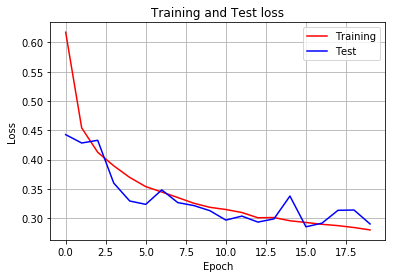

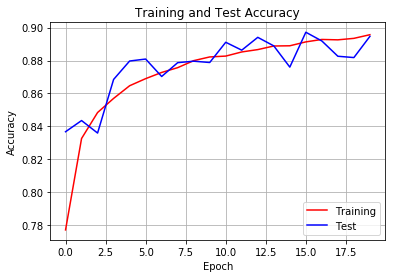

In [143]:
train_acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
train_loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

# plot training and validation loss
plt.plot(train_loss, 'r')
plt.plot(val_loss, 'b')
plt.title('Training and Test loss')
plt.legend(["Training", "Test"])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


# plot training and validation accuracy
plt.plot(train_acc, 'r')
plt.plot(val_acc, 'b')
plt.title('Training and Test Accuracy')
plt.legend(['Training', 'Test'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

The above plot shows that the loss and accuracy for test data are in sync with the training loss and training accuracy. The loss is decreasing and the accuracy is increasing.

### 3.4 Predict

Using model.predict(), we can see how many labels are predicted correctly.

In [190]:
predicted_classes = model.predict(x_test)
# round up the predicted class to avoid float number
predicted_classes = np.argmax(np.around(predicted_classes), axis = 1)
# convert from one hot encoding to intergers
y_labels = np.argmax(y_test, axis = 1)
incorrect_labels = np.where(predicted_classes!=y_labels)[0]
correct_labels = np.where(predicted_classes==y_labels)[0]
print("Incorrect labels: ", len(incorrect_labels))
print("Correct labels: ", len(correct_labels))

Incorrect labels:  1148
Correct labels:  8852


In [196]:
labels = {0:"T-shirt/top", 1:" Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 
          8: "Bag", 9: "Ankle boot"}

What are some of the incorrected predicted labels? Let's take a look at the first few incorrectly predicted pictures.

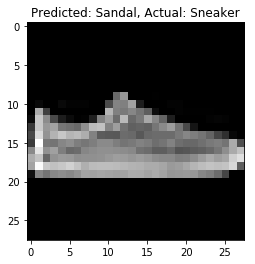

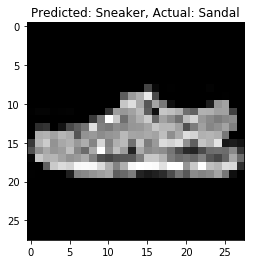

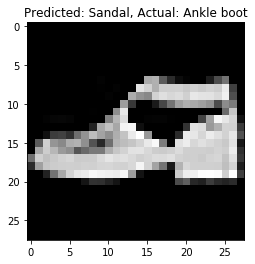

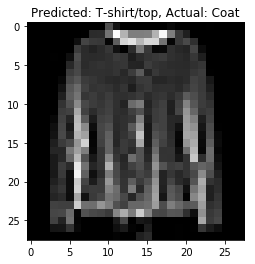

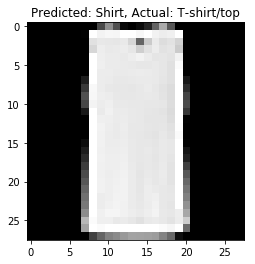

In [206]:
for i, incorrect in enumerate(incorrect_labels[0:5]):
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual: {}".format(labels[predicted_classes[incorrect]], labels[y_labels[incorrect]]))
    plt.show()

From the samples above, we can see there are indeed similarities between the falsely predicted labels and the actual labels. The ambigious patterns may lead to the miss predictions.

### 3.5 How to Improve the Performance of the Network?

Having seen the falsely predicted pictures, how can we improve the model? Here are some ideas you can explore:

1. Go deeper: we can stack more layers of netwrk, which may help extract more features closer to the input
2. Train more epochs: we have only trained 20 epoches. Performance can improve if we trained for hundreds or thousands of epochs.
3. Change parameters (activation function, optimizer...): we can try various activation functions, optimizers, and further change the parameters for optimizers to see how the accuracy is affected.
    You can explore available activation functions here: https://keras.io/activations/; available optimizers: https://keras.io/optimizers/
4. More data: more data helps the neural network achieve better generalization and reduce the chance of overfitting.

## 4. Further Resources

We have built our first CNN model in Keras, though you may feel the Fashion-MNIST dataset is not enough! Here are some additional dataset you can play with: http://deeplearning.net/datasets/

### References

1. Deep Learning wiki: https://en.wikipedia.org/wiki/Deep_learning
2. Learning deep architectures for AI: http://www.iro.umontreal.ca/~bengioy/papers/ftml_book.pdf
3. CNN wiki: https://en.wikipedia.org/wiki/Convolutional_neural_network
4. CNN: https://www.mathworks.com/discovery/convolutional-neural-network.html
5. CS231n http://cs231n.github.io/convolutional-networks/
6. Keros Documentations: https://keras.io
7. Deep learning with Python: https://livebook.manning.com/#!/book/deep-learning-with-python/
8. MNIST dataset: http://yann.lecun.com/exdb/mnist/
9. Fashion MNIST dataset: https://github.com/zalandoresearch/fashion-mnist
10. Kaggle for Fashion MNIST dataset: https://www.kaggle.com/zalando-research/fashionmnist